<a href="https://colab.research.google.com/github/muresanfilip4/AI-Labss/blob/main/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vom construi o retea neuronala simpla, cu doua straturi pentru a clasifica daca la o prajitorie de cafea se realizeaza corect sau nu prajirea cafelei in functie de temperatura si durata de prajire.

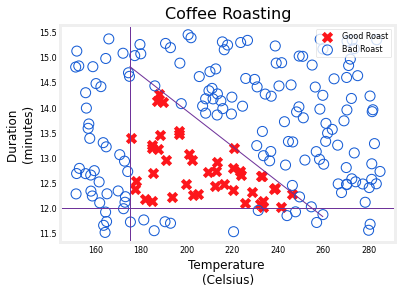

Reguli de prajire:
- sub 170 grade este insuficienta temperatura
- sub 12 minute este insuficient timpul de prajire
- peste aceste valori exista un raport relativ intre timp si temperatura asa cum rezulta din grafic; daca raportul nu este corect, cafeaua este supra-prajita

In [1]:
# importati din moodle fisierele suport pentru laborator pentru a putea face importurile necesare

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)



     


In [2]:


X,Y = load_coffee_data();
print(X.shape, Y.shape)



     


(200, 2) (200, 1)


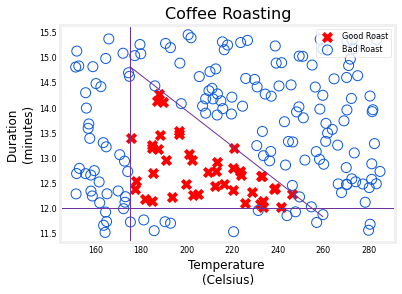

In [3]:
plt_roast(X,Y)

*Normalizarea datelor*

Deoarece exista diferente semnificative intre scala de masura a temperaturii si a timpului, este mai eficient sa normalizam datele (vedeti procedeele discutate la curs!).

Acest exemplu foloseste o procedura de normalizare folosind biblioteca [Keras](https://keras.io/api/layers/preprocessing_layers/numerical/normalization/). Normalizarea se realizeaza prin adaptarea la media si varianta datelor.


**Atentie! Este necesar de aplicat normalizarea pentru datele ce vor utiliza modelul creat!!!**


In [4]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # adaptare la medie si varianta
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


Marim setul de date prin operatiunea [tile](https://numpy.org/doc/stable/reference/generated/numpy.tile.html).


In [5]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))   
print(Xt.shape, Yt.shape)   

(200000, 2) (200000, 1)


**Construirea modelului cu ajutorul bibliotecii Tensorflow**

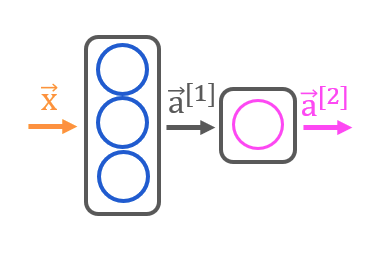

In [6]:
tf.random.set_seed(1234)  # setare parametri random
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

In [7]:
model.summary() # Descrierea retelei create

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


Numarul de parametri afisat este calculat conform arhitecturii retelei:

In [8]:
L1_num_params = 2 * 3 + 3   # W1   + b1 
L2_num_params = 3 * 1 + 1   # W2 s  + b2 
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )


L1 params =  9 , L2 params =  4


Vizualizarea ponderilor retelei. Valorile w trebuie sa aiba dimensiunea inputurilor, iar b a numarului de unitati din strat.

In [9]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)


W1(2, 3):
 [[ 0.08 -0.3   0.18]
 [-0.56 -0.15  0.89]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.43]
 [-0.88]
 [ 0.36]] 
b2(1,): [0.]


**Optimizare**

model.compile defineste o functie de cost si un algoritm de optimizare

model.fit ruleaza gradient descent pentru a gasi ponderile optime.

In [12]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)


Epoch 1/10
6250/6250 [==============================] - 10s 1ms/step - loss: 0.0066
Epoch 2/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.0047
Epoch 3/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.0034
Epoch 4/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0025
Epoch 5/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.0018
Epoch 6/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0014
Epoch 7/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.0010
Epoch 8/10
6250/6250 [==============================] - 8s 1ms/step - loss: 7.9308e-04
Epoch 9/10
6250/6250 [==============================] - 8s 1ms/step - loss: 6.1625e-04
Epoch 10/10
6250/6250 [==============================] - 8s 1ms/step - loss: 5.0511e-04


**Ponderile optimizate**
- Dupa rulare, ponderile au fost actualizate:

In [11]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)


W1:
 [[-8.94  0.29 12.89]
 [-0.17 -7.34 10.79]] 
b1: [-9.87 -9.28  1.01]
W2:
 [[-31.38]
 [-27.86]
 [-32.79]] 
b2: [15.54]


Urmatoarele ponderi au fost salvate in variabile separate deoarece rularea retelei returneaza parametri ce pot fi diferiti de la o rulare la alta.

In [10]:
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])

**Predictii**

In [14]:
X_test = np.array([
    [200,13.9],  # exemplu pozitiv
    [200,17]])   # exemplu negativ
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)


1/1 [==============================] - 0s 13ms/step
predictions = 
 [[9.98e-01]
 [1.69e-08]]


Transformarea probabilitatilor rezultate in decizii cu prag la 0.5

In [15]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


**Vizualizari**

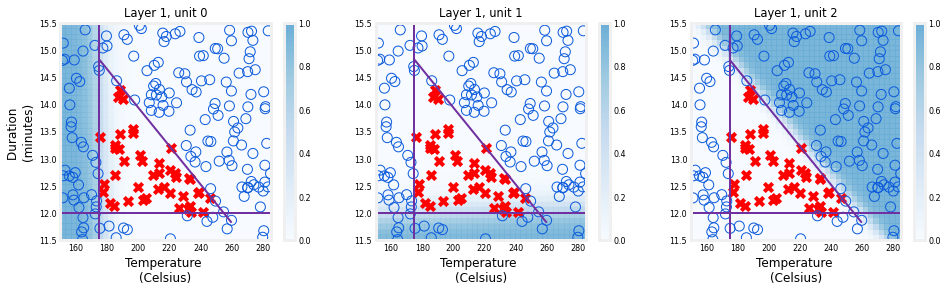

In [16]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

Graficul de mai jos din stanga reprezinta vizualizarea ultimului strat colorat cu albastru inchis. 
Graficul din dreapta reprezinta rezultatul dupa aplciarea unui prag de decizie.

7/7 [==============================] - 0s 4ms/step


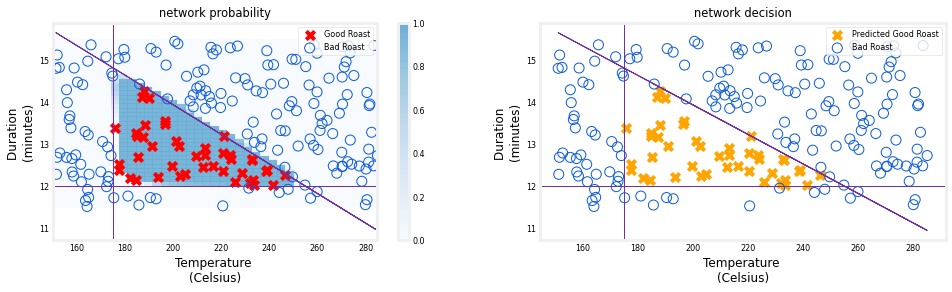

In [17]:
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)